In [1]:
from pysmiles import read_smiles
import networkx as nx
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
smile1 = 'C1CC[13CH2]CC1C1CCCCC1'
mol = read_smiles(smile1)

# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol, weight='order'))
# one node
print(mol.nodes[0])

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'C')]
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
{'element': 'C', 'charge': 0, 'aromatic': False, 'hcount': 2}


In [69]:
atom_info = pd.read_csv('raw_data/atom_info.txt',sep=',')
atom_symbol_2_number_dict = atom_info.set_index('Symbol')['AtomicNumber'].to_dict()

In [3]:
sider_smiles = pd.read_csv('sider.csv')

In [4]:
sider_smiles

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(CC[C@@]1(C)C2=CC(=CC=C2)O)C[C@H](CC3...,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1423,CC[C@@H]1[C@@]2([C@@H]([C@@H](C(=O)[C@@H](C[C@...,1,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1
1424,CCOC1=CC=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,1,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,1,1,1
1425,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...,0,1,0,1,1,1,1,0,0,...,0,0,0,1,1,0,0,1,1,1


In [3]:
def get_SMILES_from_name(molecule_name: str) -> str:

    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule_name}/property/CanonicalSMILES/TXT'
    response = requests.get(url)
    return response.content.decode('UTF-8')[:-1]

mol_name = 'acetate'
get_SMILES_from_name(mol_name)

'CC(=O)[O-]'

# SIDER

In [18]:
# Drug Names
path = 'raw_data/sider_data/'
drug_names = pd.read_csv(path+'drug_names.tsv', sep='\t', header=None, dtype=str)
drug_names.columns = ['drug_id_flat','drug_name']

# Drug ATC Codes
drug_atc = pd.read_csv(path+'drug_atc.tsv', sep='\t', header=None, dtype=str)
drug_atc.columns = ['drug_id_flat','drug_atc_code']

# Side Effects
side_effect_data = pd.read_csv(path+'meddra_all_se.tsv', sep='\t', header=None, dtype=str)
side_effect_data.columns = ['drug_id_flat','drug_id_stereo','se_ums_id','se_type','repeat_col','se_name']
side_effect_data.loc[:,'se_name'] = side_effect_data.se_name.str.lower()

# combine all data
drug_info = pd.merge(drug_names,drug_atc, on='drug_id_flat')
all_data = pd.merge(drug_info, side_effect_data, on='drug_id_flat')
all_data = all_data.drop('repeat_col',axis=1)

# select only necessary columns and general side effects (PT not LLT)
subset_feature_data = all_data.loc[all_data.se_type=='PT',['drug_name','drug_atc_code','se_name','se_ums_id']]

# remove duplicate side effects for each drug
clean_data = subset_feature_data.drop_duplicates(subset=['drug_atc_code','se_name'])
clean_data = clean_data.drop_duplicates(subset=['drug_atc_code','se_ums_id'])

In [5]:
clean_data

,drug_name,drug_atc_code,se_name,se_ums_id
1,carnitine,A16AA01,abdominal pain,C0000729
3,carnitine,A16AA01,gastrointestinal pain,C0000737
6,carnitine,A16AA01,amblyopia,C0002418
8,carnitine,A16AA01,anaemia,C0002871
10,carnitine,A16AA01,decreased appetite,C0003123
...,...,...,...,...
384990,K779,L03AB05,ageusia,C2364111
384992,K779,L03AB05,somnolence,C2830004
384994,K779,L03AB05,vaginal haemorrhage,C2979982
384997,K779,L03AB05,hypoventilation,C3203358


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

all_drugs = clean_data.drug_atc_code.unique()
binarizer_list=[]
for drug_atc in all_drugs:
    binarizer_list.append(clean_data.loc[clean_data.drug_atc_code==drug_atc].se_name.tolist())

multibin = MultiLabelBinarizer()
label_matrix = multibin.fit_transform(binarizer_list)

In [55]:
print(clean_data.loc[clean_data.groupby('drug_name').drug_atc_code.nunique()==2,'drug_name'])
sum(clean_data.groupby('drug_name').drug_atc_code.nunique()==2)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [50]:
len(clean_data.drug_atc_code.unique())

1560

In [56]:
onehot_data = pd.DataFrame(label_matrix,columns=clean_data.se_name.unique())
onehot_data.loc[:,"drug_atc"] = all_drugs
onehot_data

,abdominal pain,gastrointestinal pain,amblyopia,anaemia,decreased appetite,anxiety,arrhythmia,asthenia,atrial fibrillation,back pain,...,corneal dystrophy,pupillary disorder,cataract traumatic,vitreous prolapse,pupillary reflex impaired,pupillary deformity,retinal scar,arcus lipoides,retinal ischaemia,drug_atc
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,A16AA01
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,L03AA03
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N03AG03
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,L01XD04
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,V03AF03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J01AA12
1556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,J01AA04
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S01LA03
1558,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C10AC01


In [81]:
drugbank_to_atc_df = pd.read_csv('processed_data/drugbank/drugbankid_to_sider.csv',index_col=0)
drugbank_to_atc_df = drugbank_to_atc_df.rename(columns={"drug_atc_code": "drug_atc"})
drugbank_to_atc_df

,drug_atc,drug_name,drugbank_id
0,B01AE02,lepirudin,DB00001
1,B01AE06,bivalirudin,DB00006
2,L02AE03,goserelin,DB00014
3,B03XA01,erythropoietin,DB00016
4,H05BA01,salmon calcitonin,DB00017
...,...,...,...
929,S01BA14,loteprednol,DB00873
930,H02AB10,cortisone,DB14681
931,B06AA03,hyaluronidase,DB14740
932,S02AA11,polymyxin b,DB00781


## Drugbank

In [92]:
structure_data = pd.read_csv('raw_data/drugbank_data/drugbank_structure.csv')
structure_data = structure_data.loc[:,['DrugBank ID','Name','CAS Number','InChIKey','SMILES','Formula']]
structure_data.Name=[name.lower() for name in structure_data.Name]
structure_data = structure_data.rename(columns={"DrugBank ID": "drugbank_id"})
structure_data = structure_data.rename(columns={"Name": "drug_name","SMILES":"smiles"})
structure_data = structure_data.loc[:,['drugbank_id','drug_name','smiles']]
structure_data

,drugbank_id,drug_name,smiles
0,DB00006,bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00007,leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...
2,DB00014,goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
3,DB00027,gramicidin d,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
4,DB00035,desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
...,...,...,...
11350,DB15594,brilliant blue g,[Na+].CCOC1=CC=C(NC2=CC=C(C=C2)C(=C2\C=C/C(/C=...
11351,DB15596,aminopromazine,CN(C)CC(CN1C2=CC=CC=C2SC2=C1C=CC=C2)N(C)C
11352,DB15597,aminopentamide,CC(CC(C(N)=O)(C1=CC=CC=C1)C1=CC=CC=C1)N(C)C
11353,DB15598,ferric maltol,[Fe+3].CC1=C([O-])C(=O)C=CO1.CC1=C([O-])C(=O)C...


## Combine

In [67]:
def combine_drugbank_data(row):
    atc = row.drug_atc
    name = clean_data.loc[clean_data.drug_atc_code==row.drug_atc,'drug_name'].tolist()[0]
    print(atc, name)
    if row.drug_atc in drugbank_to_atc_df.drug_atc_code.tolist():
        db_id = drugbank_to_atc_df.loc[drugbank_to_atc_df.drug_atc_code==row.drug_atc,'drugbank_id']
    elif clean_data.loc[clean_data.drug_atc_code==row.drug_atc,'drug_name'].tolist()[0] in drugbank_to_atc_df.drug_name.tolist():
        db_id = drugbank_to_atc_df.loc[drugbank_to_atc_df.drug_name==row.drug_name,'drugbank_id']
    else:
        db_id = None
    row['drugbank_id'] = db_id
    return row
    
test=onehot_data.apply(combine_drugbank_data,axis=1)
sum(test.iloc[:,1].isna())

A16AA01 carnitine
A16AA01 carnitine
L03AA03 gamma-aminobutyric
N03AG03 gamma-aminobutyric
L01XD04 5-aminolevulinic
V03AF03 leucovorin


AttributeError: ("'Series' object has no attribute 'drug_name'", 'occurred at index 4')

In [93]:
all_data = pd.merge(pd.merge(drugbank_to_atc_df,structure_data, on=['drugbank_id','drug_name']),onehot_data, on='drug_atc')
all_data.iloc[:,7:]
all_data

,drug_atc,drug_name,drugbank_id,smiles,abdominal pain,gastrointestinal pain,amblyopia,anaemia,decreased appetite,anxiety,...,diabetic foot infection,corneal dystrophy,pupillary disorder,cataract traumatic,vitreous prolapse,pupillary reflex impaired,pupillary deformity,retinal scar,arcus lipoides,retinal ischaemia
0,B01AE06,bivalirudin,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,L02AE03,goserelin,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H01BA02,desmopressin,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,H01CC02,cetrorelix,DB00050,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,J01XX09,daptomycin,DB00080,CCCCCCCCCC(=O)N[C@@H](CC1=CNC2=C1C=CC=C2)C(=O)...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,D07AB02,hydrocortisone butyrate,DB14540,[H][C@@]12CC[C@](OC(=O)CCC)(C(=O)CO)[C@@]1(C)C...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,N03AF04,eslicarbazepine,DB14575,NC(=O)N1C2=C(C[C@H](O)C3=C1C=CC=C3)C=CC=C2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,S01BA14,loteprednol,DB00873,[H][C@@]12CC[C@](O)(C(=O)OCCl)[C@@]1(C)C[C@H](...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,H02AB10,cortisone,DB14681,[H][C@@]12CC[C@](O)(C(=O)CO)[C@@]1(C)CC(=O)[C@...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('There are {} unique drugs in the data.'.format(len(np.unique(clean_data.drug_atc_code))))
print('There are {} unique side effects in the data.'.format(len(np.unique(clean_data.se_name))))

There are 1560 unique drugs in the data.
There are 3990 unique side effects in the data.


[]

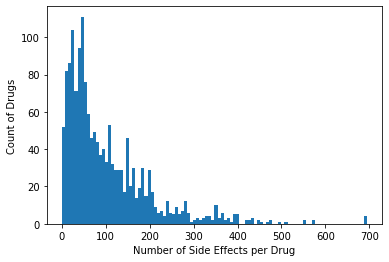

In [7]:
plt.hist(clean_data.groupby('drug_atc_code').se_name.nunique(),100)
plt.xlabel("Number of Side Effects per Drug")
plt.ylabel("Count of Drugs")
plt.plot()

[]

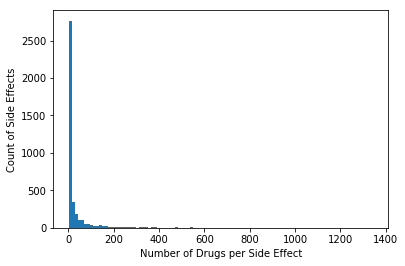

In [188]:
plt.hist(clean_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [34]:
low_threshold = len(np.unique(clean_data.drug_atc_code))*0.005
all_side_effects = np.unique(clean_data.se_name.sort_values())
uncommon_side_effects = all_side_effects[clean_data.groupby('se_name').drug_atc_code.nunique()<low_threshold]
print('There are {} side effects that occur in less than {} different drugs.'.format(len(uncommon_side_effects),low_threshold))

There are 2317 side effects that occur in less than 7.8 different drugs.


In [29]:
high_threshold = len(np.unique(clean_data.drug_atc_code))/2
all_side_effects = np.unique(clean_data.se_name.sort_values())
common_side_effects = all_side_effects[clean_data.groupby('se_name').drug_atc_code.nunique()>high_threshold]
print('There are {} side effects that occur in more than {} different drugs.'.format(len(common_side_effects),high_threshold))

There are 17 side effects that occur in more than 780.0 different drugs.


In [36]:
# filter side effects that don't occur very often
filtered_data = clean_data.loc[[True if side_effect not in common_side_effects else False for side_effect in clean_data.se_name],:]
filtered_data = filtered_data.loc[[True if side_effect not in uncommon_side_effects else False for side_effect in filtered_data.se_name],:]
len(filtered_data.drug_atc_code.unique())

1552

[]

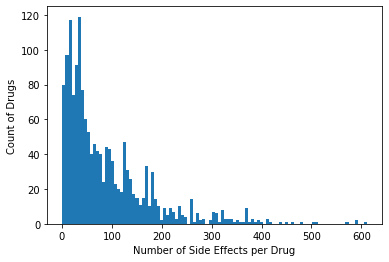

In [38]:
plt.hist(filtered_data.groupby('drug_atc_code').se_name.nunique(),100)
plt.xlabel("Number of Side Effects per Drug")
plt.ylabel("Count of Drugs")
plt.plot()

[]

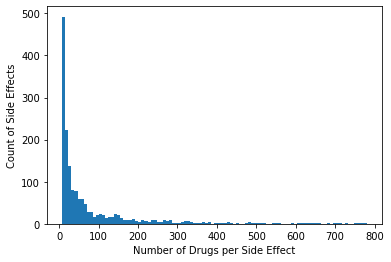

In [39]:
plt.hist(filtered_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [37]:
print('There are {} unique drugs in the data.'.format(len(np.unique(filtered_data.drug_atc_code))))
print('There are {} unique side effects in the data.'.format(len(np.unique(filtered_data.se_name))))

There are 1552 unique drugs in the data.
There are 1656 unique side effects in the data.


In [54]:
# save data for later
filtered_data.to_csv('processed_data/sider_data.csv')

In [40]:
filtered_data.groupby('se_name').drug_atc_code.nunique().quantile(0.8)

120.0

In [61]:
filtered_data.groupby('se_name').drug_atc_code.nunique().quantile(0.2)

12.0

In [55]:
def side_effects_by_frequency(data,value,lt_or_gt):
    
    num_drugs = len(data.drug_atc_code.unique())
    num_ses = len(data.se_name.unique())
    
    if lt_or_gt == '>':
        se_filter = data.groupby('se_name').drug_atc_code.nunique()>value
    elif lt_or_gt == '<':
        se_filter = data.groupby('se_name').drug_atc_code.nunique()<value
        
    side_effects = data.groupby('se_name').drug_atc_code.nunique().sort_values()[se_filter].index.tolist()
    print("{} out of {} side effects occur in {} {} drugs".format(len(side_effects),num_ses,lt_or_gt,value))
        
    return side_effects
    

In [79]:
# filter side effects that occur frequently
value = filtered_data.groupby('se_name').drug_atc_code.nunique().quantile(0.85)
common_side_effects=side_effects_by_frequency(filtered_data,value,'>')
common_se_data = filtered_data.loc[[True if side_effect in common_side_effects else False 
                                    for side_effect in filtered_data.se_name],:]
print(len(common_se_data.drug_atc_code.unique()),'drugs left')

248 out of 1656 side effects occur in > 153.0 drugs
1540 drugs left


[]

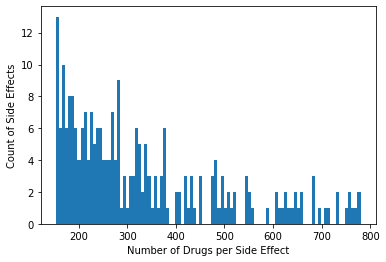

In [80]:
plt.hist(common_se_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [73]:
# filter side effects that don't occur very often
value = filtered_data.groupby('se_name').drug_atc_code.nunique().quantile(0.25)
uncommon_side_effects=side_effects_by_frequency(filtered_data,value,'<')
uncommon_se_data = filtered_data.loc[[True if side_effect in uncommon_side_effects else False 
                                      for side_effect in filtered_data.se_name],:]
print(len(uncommon_se_data.drug_atc_code.unique()),'drugs left')

399 out of 1656 side effects occur in < 14.0 drugs
963 drugs left


[]

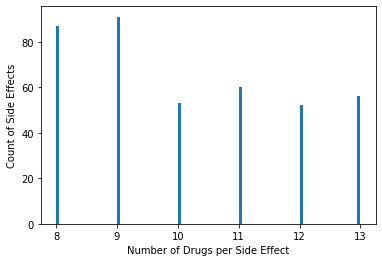

In [74]:
plt.hist(uncommon_se_data.groupby('se_name').drug_atc_code.nunique(),100)
plt.xlabel("Number of Drugs per Side Effect")
plt.ylabel("Count of Side Effects")
plt.plot()

In [18]:
import pandas as pd
train = pd.read_csv("processed_data/sider/train.csv")
val = pd.read_csv("processed_data/sider/val.csv")
test = pd.read_csv("processed_data/sider/test.csv")

In [43]:
from utils_train import get_pos_weights
import numpy as np
import matplotlib.pyplot as plt

def print_dist(train,val):
    t_labels = np.matrix(train.iloc[:,1:])
    v_labels = np.matrix(val.iloc[:,1:])
    t_dist = [t_labels[:,i].sum()/t_labels.shape[0] for i in range(t_labels.shape[1])]
    v_dist = [v_labels[:,i].sum()/v_labels.shape[0] for i in range(v_labels.shape[1])]
    x = np.arange(labels.shape[1])
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, t_dist, width, label='train')
    rects2 = ax.bar(x + width/2, v_dist, width, label='val')

    plt.show()

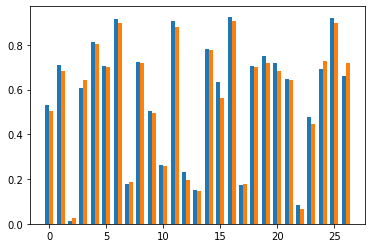

In [44]:
print_dist(train,val)

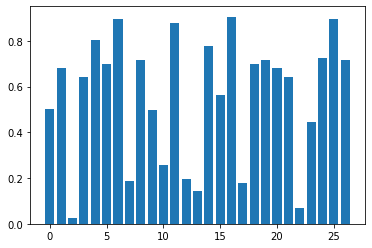

In [38]:
print_dist(val)

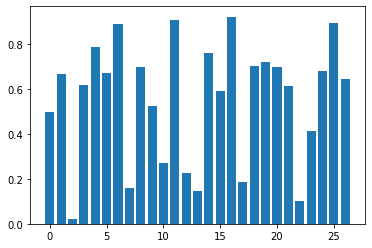

In [40]:
print_dist(test)